In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_topwords(word_dist, k=20):
    if "term" not in word_dist:
        word_dist["term"] = word_dist.index
    newlist = pd.DataFrame(columns=[item for item in word_dist.columns if item != "term"])
    for col in newlist:
        newlist[col] = word_dist.sort_values(by=col, ascending=False).head(k)["term"].values
    return newlist

def load_file(wfolder, config_name):
    topic_dist = pd.read_csv(os.path.join(wfolder, "document_topic_dist_%s.csv"%config_name))
    word_dist = pd.read_csv(os.path.join(wfolder, "topic_word_dist_%s.csv"%config_name))
    return topic_dist, word_dist, get_topwords(word_dist, 10)
    

In [3]:
wfolder = "./data/20newsgroup/"

In [12]:
labels = pd.read_csv(os.path.join(wfolder, "train.map"), delimiter=" ", header=None)

In [13]:
labels.head()

,0,1
0,alt.atheism,1
1,comp.graphics,2
2,comp.os.ms-windows.misc,3
3,comp.sys.ibm.pc.hardware,4
4,comp.sys.mac.hardware,5


# use prodlda

In [4]:
config_name = "nvprodlda_tfidf_20news"
topic_dist, word_dist, newlist = load_file(wfolder, config_name)

In [5]:
newlist

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,rear,christ,send,rutgers,thanks,moon,behanna,color,msg,game,...,cramer,israeli,copies,season,windows,tony,aspects,douglas,cica,koresh
1,wheel,god,thanks,he,appreciated,zoo,nec,apple,symptoms,team,...,sandvik,israel,condition,game,scsi,dave,split,techbook,winmarks,fbi
2,turn,church,appreciated,kaldis,advance,nasa,nj,anybody,frost,season,...,clayton,jews,interested,loser,controller,appeared,forum,download,dx,fire
3,steering,jesus,email,irvine,email,dseg,route,dtmedin,ride,teams,...,kinsey,lebanese,offers,year,dos,andrew,concerning,usenet,windows,roby
4,ride,christians,mil,rit,cad,orbit,dod,louray,food,league,...,homosexual,das,dept,he,isa,que,posts,extensive,site,compound
5,suspension,faith,archive,views,card,space,dogs,formats,jimf,year,...,homosexuality,cpr,maine,teams,card,halifax,engin,freenet,fine,udel
6,callison,religion,tektronix,bobby,polygon,ti,fxwg,dos,headache,pitching,...,bi,arabs,sale,team,disk,feustel,awful,graphics,de,christian
7,front,christian,advance,god,mail,henry,ltd,thanks,motorcycles,baseball,...,optilink,israelis,offer,pitching,monitor,june,learn,uunet,ati,god
8,car,view,cica,koresh,picture,jsc,contact,mb,car,he,...,exclusively,igc,speakers,league,dx,chi,tmc,cosmo,card,children
9,ama,catholic,mail,ultb,ltd,zoology,pack,mail,sc,staff,...,sexual,adam,send,lemieux,vga,return,discussing,thanks,graphics,surrender


In [11]:
topic_dist.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'top_topic', 'cat'],
      dtype='object')

In [14]:
xtable = topic_dist.groupby(["top_topic", "cat"]).size().unstack()
xtable.columns = labels[0].values
xtable

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
top_topic,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,3.0,1.0,17.0,120.0,190.0,2.0,1.0,NaN,9.0,2.0,8.0,NaN,2.0,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,NaN,2.0,1.0,NaN,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0
5,NaN,14.0,2.0,2.0,4.0,4.0,7.0,5.0,1.0,NaN,1.0,2.0,78.0,10.0,223.0,NaN,NaN,2.0,1.0,NaN
6,NaN,NaN,1.0,NaN,NaN,1.0,8.0,13.0,31.0,1.0,1.0,NaN,5.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0
8,NaN,NaN,NaN,1.0,2.0,NaN,3.0,68.0,69.0,1.0,NaN,NaN,9.0,4.0,6.0,NaN,NaN,NaN,1.0,NaN
9,1.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,5.0,433.0,483.0,NaN,3.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0
10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,6.0,3.0,NaN,2.0,2.0,NaN,NaN


In [17]:
tt = newlist[[str(item) for item in xtable.idxmax(axis=0).values]]
tt.columns = labels[0].values
tt

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,christ,scsi,scsi,scsi,scsi,scsi,copies,msg,rear,game,game,key,scsi,koresh,moon,christ,gun,israeli,fbi,christ
1,god,floppy,floppy,floppy,floppy,floppy,condition,lonestar,wheel,team,team,encryption,floppy,fbi,zoo,god,government,israel,waco,god
2,faith,dos,dos,dos,dos,dos,interested,food,turn,season,season,crypto,dos,fire,nasa,faith,bear,jews,batf,faith
3,jesus,windows,windows,windows,windows,windows,offers,effects,steering,teams,teams,keys,windows,roby,dseg,jesus,militia,lebanese,government,jesus
4,christian,card,card,card,card,card,dept,gun,ride,league,league,clipper,card,compound,orbit,christian,handguns,das,compound,christian
5,sin,ide,ide,ide,ide,ide,maine,viking,suspension,year,year,chip,ide,udel,space,sin,nra,cpr,crimes,sin
6,christians,running,running,running,running,running,sale,foods,callison,pitching,pitching,nsa,running,christian,ti,christians,crime,arabs,gun,christians
7,bible,monitor,monitor,monitor,monitor,monitor,offer,serious,front,baseball,baseball,secure,monitor,god,henry,bible,guns,israelis,koresh,bible
8,church,file,file,file,file,file,speakers,chinese,car,he,he,des,file,children,jsc,church,firearms,igc,crime,church
9,christianity,application,application,application,application,application,send,iastate,ama,staff,staff,algorithm,application,surrender,zoology,christianity,weapons,adam,federal,christianity


In [8]:
topic_dist_test = pd.read_csv(os.path.join(wfolder, "document_topic_dist_test_%s.csv"%config_name))

In [9]:
newlist[[str(item) for item in xtable.idxmax(axis=0).values]]

,39,11,11,11,11,11,42,38,0,9,9,25,11,49,5,39,26,41,22,39
0,christ,scsi,scsi,scsi,scsi,scsi,copies,msg,rear,game,game,key,scsi,koresh,moon,christ,gun,israeli,fbi,christ
1,god,floppy,floppy,floppy,floppy,floppy,condition,lonestar,wheel,team,team,encryption,floppy,fbi,zoo,god,government,israel,waco,god
2,faith,dos,dos,dos,dos,dos,interested,food,turn,season,season,crypto,dos,fire,nasa,faith,bear,jews,batf,faith
3,jesus,windows,windows,windows,windows,windows,offers,effects,steering,teams,teams,keys,windows,roby,dseg,jesus,militia,lebanese,government,jesus
4,christian,card,card,card,card,card,dept,gun,ride,league,league,clipper,card,compound,orbit,christian,handguns,das,compound,christian
5,sin,ide,ide,ide,ide,ide,maine,viking,suspension,year,year,chip,ide,udel,space,sin,nra,cpr,crimes,sin
6,christians,running,running,running,running,running,sale,foods,callison,pitching,pitching,nsa,running,christian,ti,christians,crime,arabs,gun,christians
7,bible,monitor,monitor,monitor,monitor,monitor,offer,serious,front,baseball,baseball,secure,monitor,god,henry,bible,guns,israelis,koresh,bible
8,church,file,file,file,file,file,speakers,chinese,car,he,he,des,file,children,jsc,church,firearms,igc,crime,church
9,christianity,application,application,application,application,application,send,iastate,ama,staff,staff,algorithm,application,surrender,zoology,christianity,weapons,adam,federal,christianity


In [10]:
xtable = topic_dist_test.groupby(["top_topic", "cat"]).size().unstack()
xtable

cat,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
top_topic,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,134.0,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.0,3.0,NaN,1.0,2.0,NaN,4.0,2.0,NaN,NaN,1.0,22.0,5.0,162.0,NaN,NaN,NaN,1.0,1.0
6,NaN,2.0,NaN,NaN,NaN,1.0,6.0,7.0,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
8,NaN,NaN,NaN,NaN,1.0,NaN,1.0,39.0,51.0,1.0,NaN,NaN,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,4.0,NaN,2.0,1.0,3.0,2.0,1.0,289.0,331.0,NaN,1.0,1.0,3.0,NaN,1.0,2.0,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# meta prodlda

In [18]:
config_name = "nvprodlda_tfidf_20news_w_meta"
topic_dist, word_dist, newlist = load_file(wfolder, config_name)

In [374]:
newlist

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,car,gif,hit,weapons,sell,keith,mac,leafs,rutgers,window,...,reflect,code,algorithm,space,faith,space,waco,cornell,motherboard,catbyte
1,cars,pov,atlanta,gun,shipping,caltech,simms,cal,athos,exe,...,driver,oak,keys,rockets,rutgers,henry,weapons,helmet,ide,current
2,toyota,graphics,viola,rkba,sale,tek,food,playoffs,faith,windows,...,disk,lines,chip,henry,christian,rockets,uicvm,evans,controller,ingr
3,uoknor,images,smith,handgun,condition,gap,lciii,maynard,god,file,...,windows,pd,key,nasa,christianity,project,assault,duke,eisa,wire
4,autos,hidden,cal,waco,offer,ico,patients,pittsburgh,clh,width,...,hd,ac,voice,eng,athos,nasa,police,up,scsi,resistor
5,bird,formula,year,batf,best,qur,disease,winnipeg,christianity,manager,...,install,source,secret,ke,clh,zoo,gas,bike,gateway,electrical
6,engine,algorithms,ball,firearms,price,rit,psychology,round,scripture,motif,...,dos,msdos,encryption,orbit,church,alaska,revolvers,ama,dx,tv
7,callison,viewer,baseball,guns,includes,islamic,adb,pick,son,space,...,cica,draw,secure,gov,scsi,pad,suicide,phillies,bus,mounted
8,hou,requires,fan,ifi,perfect,vice,surgery,flames,geneva,height,...,drivers,shareware,informatik,zoo,understanding,utzoo,compound,yamaha,isa,circuits
9,dealer,files,astros,violent,interested,moral,severe,chi,christian,birds,...,printer,users,communications,lunar,accept,spencer,fbi,spring,floppy,trace


In [19]:
xtable = topic_dist.groupby(["top_topic", "cat"]).size().unstack()
xtable.columns = labels[0].values
xtable

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
top_topic,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
tt = newlist[[str(item) for item in xtable.idxmax(axis=0).values]]
tt.columns = labels[0].values
tt

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,caltech,graphics,windows,reliability,mac,window,sale,toyota,bike,shuttle,team,clipper,electronics,tends,orbit,sin,waco,closed,team,sandvik
1,cco,image,driver,toyota,se,server,condition,car,riding,mission,game,secure,tube,pitt,satellite,god,weapons,armenian,game,kent
2,bronx,conversion,cica,drive,macs,xterm,offer,cars,ride,orbit,pittsburgh,key,measure,doctors,planet,paul,gun,mcgill,steveh,activities
3,gap,hidden,truetype,windows,nubus,root,interested,dealer,dod,henry,montreal,escrow,trace,soon,shuttle,church,texas,passes,year,god
4,jon,gif,characters,bus,fixed,xlib,selling,hou,bnr,space,gld,keys,circuit,std,jpl,rutgers,sw,serve,ted,newton
5,tek,animation,utility,cars,apple,sunos,shipping,vehicles,rider,aaa,stanley,approved,circuits,jxp,astronomy,authority,laws,escape,russia,morality
6,mozumder,split,dos,dos,lc,mit,call,ford,wave,toronto,nhl,scheme,analog,rind,space,soul,cube,proceeded,brett,alink
7,allan,comp,microsoft,car,lciii,widget,price,driving,ed,nasa,winnipeg,chip,cooling,blood,orbital,christianity,vos,arab,baseball,century
8,species,images,font,overpass,difference,ld,contact,gt,ama,koufax,chi,security,transmitter,rapid,nasa,athos,motivation,melkonian,cigarettes,life
9,bobby,library,desktop,dx,monitor,lib,features,automobiles,fit,runs,islanders,kadie,rf,immune,henry,heaven,fbi,soviet,season,objective


# author lda

In [21]:
config_name = "nvprodlda_tfidf_20news_author"
topic_dist, word_dist, newlist = load_file(wfolder, config_name)

In [22]:
newlist

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,einstein,nature,nhl,geb,alas,spoke,quadra,israel,reid,wow,...,tough,enemy,trinity,mets,mouse,mozumder,shelley,attend,pictures,motif
1,vw,polls,hockey,dsl,percent,mpeg,retail,israeli,ksu,circa,...,favor,passenger,pins,ball,downloaded,snm,ns,reduced,ast,widget
2,karl,odometer,playoffs,jxp,admiral,lo,penguins,arab,glory,chart,...,treasury,intervention,und,lopez,mg,buphy,buck,dma,algorithms,window
3,uq,wade,team,intellect,gangs,ece,portal,turkish,greek,avoided,...,ec,adelaide,strength,kk,pixels,morality,wam,online,aspects,server
4,belong,pops,rangers,chastity,plains,queries,offense,armenians,dealer,adobe,...,mach,integration,copyright,uky,cheap,jaeger,mmalt,uart,nyi,xterm
5,resurrection,wesleyan,lemieux,skepticism,changed,labor,catbyte,turks,esin,transfers,...,adaptec,trade,summary,bellcore,hercules,qur,africa,zip,lands,openwindows
6,relative,link,goals,banks,partial,martian,dtmedin,arabs,bitmap,experiences,...,lan,giving,dat,difficulties,nj,solntze,waikato,islanders,tmc,xlib
7,tolerance,modules,wings,shameful,jeremy,fluke,med,armenia,murphy,directories,...,keywords,vram,advantages,utxvms,callison,gregg,visa,rbi,implement,application
8,assembler,identify,leafs,gordon,planes,extraordinary,title,occupied,beckman,binary,...,undefined,ws,developing,volume,senses,benedikt,nmsu,csa,result,widgets
9,bt,waikato,stanley,cadre,yamaha,arizona,beware,armenian,feeling,lets,...,appreciate,kidding,papal,therapy,emory,alink,mahan,digitized,convenience,contrib


In [31]:
topic_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,top_topic,cat
0,0.000327,-0.000322,0.000157,-0.000107,0.000291,-0.000002,-0.000169,-0.000249,-0.000183,0.000348,...,0.000256,-0.000137,0.000164,0.000071,0.000075,-0.000073,-0.000053,0.00004,9,1
1,0.009215,-0.000322,0.000157,-0.000107,0.000291,-0.000002,-0.000169,-0.000249,-0.000183,0.000348,...,0.000256,-0.000137,0.000164,0.000071,0.000075,-0.000073,-0.000053,0.00004,0,1
2,0.016198,-0.000322,0.000157,-0.000107,0.000291,-0.000002,-0.000169,-0.000249,-0.000183,0.000348,...,0.000256,-0.000137,0.000164,0.000071,0.000075,-0.000073,-0.000053,0.00004,0,1
3,-0.001013,-0.000322,0.000157,-0.000107,0.000291,-0.000002,-0.000169,-0.000249,-0.000183,0.000348,...,0.000256,-0.000137,0.000164,0.000071,0.000075,-0.000073,-0.000053,0.00004,9,1
4,0.014119,-0.000322,0.000157,-0.000107,0.000291,-0.000002,-0.000169,-0.000249,-0.000183,0.000348,...,0.000256,-0.000137,0.000164,0.000071,0.000075,-0.000073,-0.000053,0.00004,0,1


In [396]:
lables = pd.DataFrame([item.split() for item in """alt.atheism 1
comp.graphics 2
comp.os.ms-windows.misc 3
comp.sys.ibm.pc.hardware 4
comp.sys.mac.hardware 5
comp.windows.x 6
misc.forsale 7
rec.autos 8
rec.motorcycles 9
rec.sport.baseball 10
rec.sport.hockey 11
sci.crypt 12
sci.electronics 13
sci.med 14
sci.space 15
soc.religion.christian 16
talk.politics.guns 17
talk.politics.mideast 18
talk.politics.misc 19
talk.religion.misc 20""".split("\n")])

In [401]:
topic_dist.shape, topic_dist_test.shape

((11269, 22), (7505, 22))

In [402]:
11269+7505

18774

[Text(0, 0, 'alt.atheism'),
 Text(0, 0, 'comp.graphics'),
 Text(0, 0, 'comp.os.ms-windows.misc'),
 Text(0, 0, 'comp.sys.ibm.pc.hardware'),
 Text(0, 0, 'comp.sys.mac.hardware'),
 Text(0, 0, 'comp.windows.x'),
 Text(0, 0, 'misc.forsale'),
 Text(0, 0, 'rec.autos'),
 Text(0, 0, 'rec.motorcycles'),
 Text(0, 0, 'rec.sport.baseball'),
 Text(0, 0, 'rec.sport.hockey'),
 Text(0, 0, 'sci.crypt'),
 Text(0, 0, 'sci.electronics'),
 Text(0, 0, 'sci.med'),
 Text(0, 0, 'sci.space'),
 Text(0, 0, 'soc.religion.christian'),
 Text(0, 0, 'talk.politics.guns'),
 Text(0, 0, 'talk.politics.mideast'),
 Text(0, 0, 'talk.politics.misc'),
 Text(0, 0, 'talk.religion.misc')]

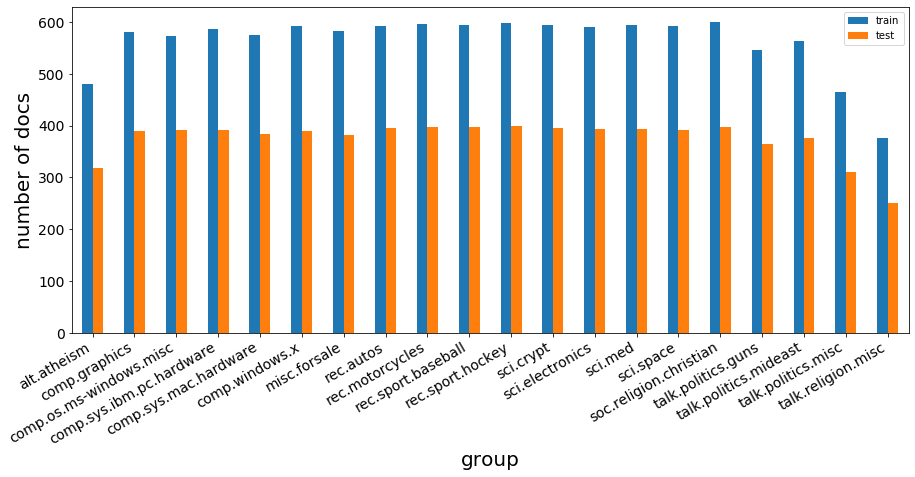

In [400]:
cnt_by_cat = pd.concat([topic_dist.cat.value_counts().sort_index(), 
                        topic_dist_test.cat.value_counts().sort_index()], axis=1)


fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
cnt_by_cat.plot(kind="bar", ax=ax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("group", fontsize=20)
ax.set_ylabel("number of docs", fontsize=20)
ax.legend(["train", "test"])

ax.set_xticklabels(lables[0].tolist(), rotation=30, ha="right")

In [30]:
xtable = topic_dist.groupby(["top_topic", "cat"]).size().unstack()
xtable

cat,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
top_topic,,,,,,,,,,,,,,,,,,,,
0,398.0,NaN,545.0,3.0,295.0,155.0,NaN,580.0,596.0,18.0,103.0,387.0,146.0,585.0,210.0,13.0,515.0,533.0,432.0,NaN
1,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
prior_topic_dist = pd.read_csv(os.path.join(wfolder, "prior_topic_dist_%s.csv"%config_name)).T

In [24]:
prior_topic_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.099512,-0.973591,-1.294728,-2.865850,-1.186238,-3.859685,-3.048989,-0.259469,-3.002172,-2.805328,-3.479305,-1.737473,-1.687589,-3.179952,-0.776881,-0.534286,-1.699044,-1.716358,-1.756907,1.735200
1,1.795778,-2.906040,0.318726,-1.108265,-0.502489,-4.686891,0.475209,-1.611736,-1.786375,-0.701332,-3.678659,-2.242850,-1.165242,-0.239521,-2.824668,-1.547179,-2.654825,-1.615193,-3.405383,0.715858
2,0.615646,-1.095006,-1.611412,-0.951651,-3.235685,-2.360544,-1.479845,-0.822313,-2.682006,-1.494775,4.002973,-3.881905,-0.801282,-2.592760,-2.472676,-2.330354,-3.070871,-4.118736,-0.946257,-2.294071
3,-0.077688,-1.984586,-0.953105,-2.083373,-2.306696,-1.329044,-1.142168,-2.064709,-2.643561,-1.247264,-1.615009,-4.571542,-2.113061,4.627831,-2.786988,-2.468902,-2.590947,-3.727742,-2.376852,-1.946584
4,-1.968676,-1.528083,-2.555424,-3.121405,-1.278104,-2.507334,-2.361966,-1.473278,-1.507113,-1.452012,-2.742056,-2.153505,-3.297123,-1.873658,-2.986965,-1.536266,-2.940108,-0.283720,-0.745477,-0.558369
5,-2.315343,-2.829331,-2.223018,-1.542510,-1.536757,-1.054715,-2.236041,-2.480527,-2.224938,-2.549369,-2.080015,-2.332634,-3.187579,-2.029201,-1.349725,-2.005954,-1.603225,-0.642954,-3.047533,-1.308573
6,-2.051882,-2.036469,-1.683038,-4.064316,1.205711,-1.019925,-1.066310,-2.488978,-3.035811,-3.542218,-2.959544,-3.578341,-2.395443,-0.812214,-3.715488,-1.485770,-3.532789,-0.554039,-3.686149,-0.958696
7,-0.814265,-3.370818,1.016396,-3.496686,-2.207995,-1.904505,-1.982553,-1.482576,-1.950162,0.312101,-0.611741,-1.420798,-1.298773,-0.548385,-2.295198,0.748528,-1.730114,5.314767,-1.397806,2.640946
8,0.178789,-3.416849,-0.718200,-2.076897,-1.786723,-0.976356,-2.603325,-0.671130,-4.474628,1.257303,-4.009776,-2.384800,-1.874278,-0.183692,-4.406432,-1.192572,-1.342449,-0.868667,-0.319162,-0.253828
9,-2.253126,-0.842221,-1.563569,-1.911131,-2.735257,-1.515630,-0.706309,-2.064820,-3.322937,-2.124928,-1.615485,-2.355331,-3.102420,-2.497270,-1.198472,-1.093550,-2.686148,-1.766338,-3.305939,-3.223077


In [72]:
prior_topic_dist[0].sort_values(ascending=False)

33     7.834979
35     7.238906
38     7.205078
30     6.616564
3      6.165310
40     5.571364
41     5.533027
36     5.349412
48     5.238113
21     4.814374
2      4.806137
45     4.379818
46     3.972545
44     3.859200
5      3.543584
49     3.464957
42     3.024178
22     2.623076
24     1.130927
29     0.986773
32     0.963027
23     0.906600
8      0.820493
4      0.561149
15     0.331134
10    -0.342632
17    -0.583386
12    -0.847029
14    -0.863923
20    -1.704674
28    -2.399498
13    -3.336068
47    -3.574038
6     -4.539536
1     -4.986028
18    -5.061054
34    -5.369216
7     -5.634975
31    -6.242856
27    -7.046482
16    -7.621100
9     -8.391785
39    -9.684275
25   -10.650446
37   -11.254273
19   -11.423498
43   -13.082590
11   -13.118721
26   -14.234354
0    -17.695063
Name: 0, dtype: float64

In [25]:
toptopics = get_topwords(prior_topic_dist, k=5)
toptopics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,45,12,31,20,10,49,20,35,11,26,2,19,31,3,20,16,33,7,11,26
1,26,35,10,49,25,21,1,11,33,43,33,36,13,25,15,26,40,31,15,7
2,1,21,11,44,39,45,31,34,25,21,32,14,10,18,21,7,20,22,35,33
3,42,40,27,21,6,8,37,26,24,8,26,35,43,23,25,42,15,16,32,0
4,2,45,7,25,37,6,24,13,4,31,38,43,17,28,22,33,35,11,12,43


In [26]:
newlist[toptopics.iloc[0].values]

,45,12,31,20,10,49,20,35,11,26,2,19,31,3,20,16,33,7,11,26
0,mozumder,graphics,circuit,sale,mac,motif,sale,graphics,bike,pitching,nhl,key,circuit,geb,sale,athos,gun,israel,bike,pitching
1,snm,polygon,voltage,space,lc,widget,space,image,dod,braves,hockey,clipper,voltage,dsl,space,christ,firearms,israeli,dod,braves
2,buphy,format,electronics,orbit,quadra,window,orbit,cars,ride,hitter,playoffs,encryption,electronics,jxp,orbit,god,guns,arab,ride,hitter
3,morality,algorithms,circuits,offer,apple,server,offer,car,motorcycle,dodgers,team,escrow,circuits,intellect,offer,christians,firearm,turkish,motorcycle,dodgers
4,jaeger,shading,amp,shipping,nubus,xterm,shipping,gif,riding,pitcher,rangers,keys,amp,chastity,shipping,geneva,weapons,armenians,riding,pitcher
5,qur,tiff,khz,lunar,centris,openwindows,lunar,routine,bikes,hitting,lemieux,nsa,khz,skepticism,lunar,rutgers,batf,turks,bikes,hitting
6,solntze,animation,transformer,launch,powerbook,xlib,launch,rendering,cramer,baseball,goals,encrypted,transformer,banks,launch,clh,handguns,arabs,cramer,baseball
7,gregg,images,audio,moon,pds,application,moon,tiff,ama,cubs,wings,secure,audio,shameful,moon,church,ifas,armenia,ama,cubs
8,benedikt,image,detector,nasa,lciii,widgets,nasa,library,rider,sandvik,leafs,crypto,detector,gordon,nasa,jesus,weapon,occupied,rider,sandvik
9,alink,dimensional,radar,controller,simms,contrib,controller,civic,helmet,hitters,stanley,cryptography,radar,cadre,controller,christian,cdt,armenian,helmet,hitters


In [27]:
topic_dist_test = pd.read_csv(os.path.join(wfolder, "document_topic_dist_test_%s.csv"%config_name))

In [28]:
xtable = topic_dist_test.groupby(["top_topic", "cat"]).size().unstack()
xtable

cat,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
top_topic,,,,,,,,,,,,,,,,,,,,
0,161.0,2.0,2.0,1.0,NaN,1.0,6.0,1.0,1.0,2.0,1.0,8.0,8.0,9.0,2.0,25.0,2.0,2.0,14.0,36.0
1,13.0,252.0,56.0,14.0,8.0,43.0,15.0,4.0,1.0,NaN,NaN,5.0,17.0,9.0,6.0,3.0,3.0,NaN,3.0,10.0
2,2.0,20.0,23.0,11.0,5.0,24.0,NaN,15.0,5.0,15.0,11.0,25.0,32.0,5.0,4.0,NaN,1.0,2.0,NaN,NaN
3,9.0,20.0,142.0,288.0,40.0,26.0,36.0,13.0,2.0,4.0,2.0,5.0,35.0,14.0,5.0,17.0,3.0,1.0,3.0,12.0
4,7.0,7.0,29.0,21.0,258.0,3.0,10.0,4.0,27.0,2.0,3.0,6.0,19.0,4.0,1.0,NaN,4.0,NaN,2.0,11.0
5,5.0,28.0,32.0,6.0,4.0,244.0,1.0,4.0,NaN,1.0,2.0,11.0,1.0,11.0,1.0,3.0,5.0,NaN,4.0,2.0
6,1.0,9.0,14.0,9.0,14.0,22.0,276.0,14.0,5.0,12.0,7.0,2.0,13.0,4.0,42.0,1.0,1.0,5.0,5.0,5.0
7,2.0,NaN,3.0,NaN,5.0,1.0,1.0,248.0,14.0,3.0,3.0,1.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0
8,3.0,6.0,6.0,2.0,NaN,4.0,5.0,21.0,283.0,9.0,1.0,4.0,13.0,7.0,2.0,1.0,3.0,7.0,1.0,NaN


In [29]:
from sklearn import metrics

In [30]:
print(metrics.classification_report(topic_dist_test.cat.values.astype(np.int32) - 1, 
                                    topic_dist_test.top_topic.values.astype(np.int32)))

              precision    recall  f1-score   support

           0       0.57      0.51      0.53       318
           1       0.55      0.65      0.59       389
           2       0.12      0.06      0.08       391
           3       0.43      0.73      0.54       392
           4       0.62      0.67      0.64       383
           5       0.67      0.63      0.65       390
           6       0.60      0.72      0.65       382
           7       0.85      0.63      0.72       395
           8       0.75      0.71      0.73       397
           9       0.84      0.76      0.80       397
          10       0.84      0.83      0.84       399
          11       0.77      0.71      0.74       395
          12       0.51      0.56      0.53       393
          13       0.74      0.69      0.72       393
          14       0.76      0.63      0.69       392
          15       0.75      0.70      0.72       398
          16       0.64      0.75      0.69       364
          17       0.80    